In [118]:
import pandas as pd
from collections import Counter

import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to /Users/allen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [195]:
chat_bot = pd.read_csv('Sheet_1.csv').iloc[:,:3]
resume = pd.read_csv('Sheet_2.csv',encoding='latin-1')

## Exploratory analysis of dataset

In [196]:
def cloud(text, stopwords):
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot Response")

In [200]:
chat_bot.head()

,response_id,class,response_text
0,response_1,not_flagged,I tri and avoid thi sort of conflict
1,response_2,flagged,had a friend open up to me about hi mental add...
2,response_3,flagged,I save a girl from suicid once. she wa go to s...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,onli realli one friend who doesn't fit into th...


In [201]:
chat_bot['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

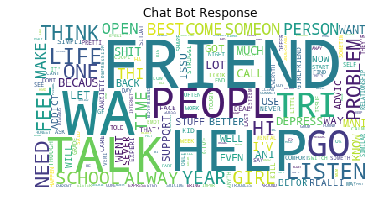

In [202]:
cloud(chat_bot['response_text'],STOPWORDS)

In [170]:
wordblob = " ".join([i for i in chat_bot['response_text'].str.upper()])

In [171]:
WordCount = [(k, Counter(wordblob.split())[k]) for k in sorted(Counter(wordblob.split()), key=Counter(wordblob.split()).get, reverse=True)]

In [172]:
words = [(i,j) for i,j in WordCount if i.lower() not in STOPWORDS]

In [173]:
print (words[:10])

[('FRIEND', 23), ('FRIENDS', 22), ('PEOPLE', 20), ('HELPED', 15), ('HELP', 13), ('TALK', 12), ('GOING', 10), ('TRY', 9), ('ONE', 9), ('TALKED', 8)]


## Model building

In [197]:
def lemm_stem_df(x):
    return " ".join([lmtzr.lemmatize(i) for i in x.split()])

In [198]:
lmtzr = WordNetLemmatizer()
stem = PorterStemmer()

In [199]:
chat_bot['response_text'] = chat_bot['response_text'].apply(lambda x: lemmatize_df(x))

In [13]:
X = chat_bot['response_text']
y = chat_bot['class']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
y_train = preprocessing.LabelEncoder().fit_transform(y_train)

In [19]:
sum(y_train)/len(y_train)

0.68333333333333335

In [29]:
preprocessing.LabelEncoder().fit_transform(y_train)

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
wordCloud